# Demonstrate all PyGMET inputs/outputs according to their output order

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


# Inputs


## Input station csv list

In [2]:
df_in_stncsv = pd.read_csv('../test_cases/cali2017/inputs/CALI.screened_stn_list_slope.v3.csv')
df_in_stncsv.head()

,stnid,lat,lon,elev,slp_n,slp_e
0,US1CAAL0003,37.7169,-122.0585,163.4,1.953,4.542
1,US1CADN0001,41.8240,-124.1482,19.8,-2.948,15.123
2,US1CAFR0003,36.9897,-119.3971,509.9,-18.502,27.648
3,US1CAHM0001,40.8809,-124.0692,128.0,1.367,13.230
4,US1CAHM0002,40.8248,-124.0382,23.5,1.730,14.267


## Input station netcdf
Each station has one file  
Station files do not need to have all variables (this will be processed in data processing part)

In [3]:
ds_in_stn = xr.load_dataset('../test_cases/cali2017/inputs/stndata/USC00040379.nc')
ds_in_stn

<xarray.Dataset>
Dimensions:         (time: 28)
Coordinates:
  * time            (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-28
Data variables:
    fill_flag_prcp  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    fill_flag_tmax  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    fill_flag_tmin  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    prcp            (time) float32 1.297 64.8 1.797 0.0 ... 0.0 0.0 4.297 0.0
    tmax            (time) float32 18.9 15.6 13.3 14.4 ... 10.6 11.7 9.398 11.1
    tmin            (time) float32 7.203 8.297 8.898 5.602 ... -1.703 1.102 0.0
Attributes:
    Conventions:  CF-1.6
    title:        Daily Global Historical Climatology Network (GHCN-DAILY)
    institution:  NOAA National Climatic Data Center
    source:       surface observations
    references:   Menne, M.J., I. Durre, R.S. Vose, B.E. Gleason, and T.G. Ho...
    history:      Wed Nov 11 09:13:52 2020: ncks -d time,2017-02-01,2017-02-2...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...

## Input domain grids

In [4]:
ds_in_domain = xr.load_dataset('../test_cases/cali2017/inputs/CALI.gridinfo.0625_v3.nc')
ds_in_domain

<xarray.Dataset>
Dimensions:       (param: 1, y: 144, x: 112)
Dimensions without coordinates: param, y, x
Data variables:
    dx            (param) float64 0.0625
    dy            (param) float64 0.0625
    elev          (y, x) float64 nan nan nan ... 1.549e+03 1.387e+03 1.309e+03
    gradient_n_s  (y, x) float64 nan nan nan nan nan ... 1.149 1.05 1.132 1.336
    gradient_w_e  (y, x) float64 nan nan nan nan ... -1.177 -1.855 -2.664 -3.3
    latitude      (y, x) float64 34.53 34.53 34.53 34.53 ... 43.47 43.47 43.47
    longitude     (y, x) float64 -124.7 -124.7 -124.6 ... -117.9 -117.8 -117.8
    mask          (y, x) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
    startx        (param) float64 25.0
    starty        (param) float64 -125.0
Attributes:
    history:  Wed Aug 21 20:23:50 2019: ncks -d x,4,115 -d y,152,295 WEST.gri...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

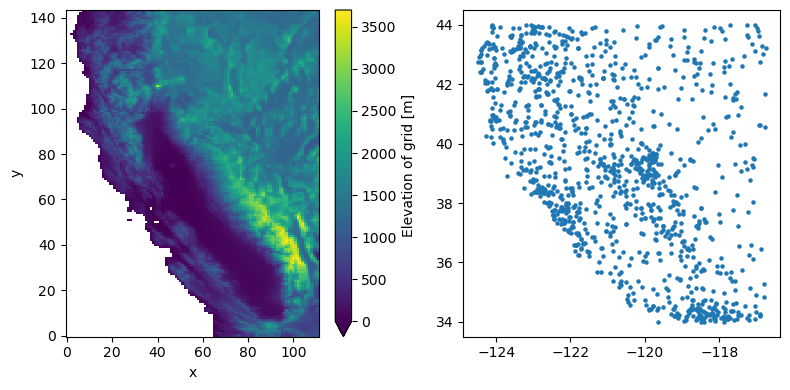

In [5]:
fig, axs = plt.subplots(1,2,figsize=[8, 4])

ds_in_domain.elev.plot(ax=axs[0], vmin=0)

axs[1].scatter(df_in_stncsv['lon'].values, df_in_stncsv['lat'].values, 5)

plt.tight_layout()
plt.show()

# Outputs

## Station information
Individual stations are merged to one file, which makes data reading much easier  
Variable transformation is also performed if needed  

### station data

In [6]:
ds_stn = xr.load_dataset('../test_cases/cali2017/outputs/stn_info/all_station_data.nc')
ds_stn

<xarray.Dataset>
Dimensions:      (stn: 1219, time: 28)
Coordinates:
  * stn          (stn) int64 0 1 2 3 4 5 6 ... 1213 1214 1215 1216 1217 1218
  * time         (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-28
Data variables:
    stnid        (stn) |S11 b'US1CAAL0003' b'US1CADN0001' ... b'USW00094299'
    lat          (stn) float64 37.72 41.82 36.99 40.88 ... 43.59 42.15 41.49
    lon          (stn) float64 -122.1 -124.1 -119.4 ... -119.0 -121.7 -120.6
    elev         (stn) float64 163.4 19.8 509.9 ... 1.245e+03 1.334e+03
    slp_n        (stn) float64 1.953 -2.948 -18.5 1.367 ... -3.662 -0.783 2.381
    slp_e        (stn) float64 4.542 15.12 27.65 13.23 ... -1.007 -0.337 3.916
    prcp         (stn, time) float32 0.0 3.602 17.5 2.0 ... 2.0 1.0 1.5 0.0
    tmin         (stn, time) float32 nan nan nan nan ... -9.297 -11.6 -13.2 -8.3
    tmax         (stn, time) float32 nan nan nan nan ... 2.203 2.203 1.703 3.297
    tmean        (stn, time) float32 nan nan nan nan ... -4.699 -5.748 -2.502
    trange       (stn, time) float32 nan nan nan nan nan ... 11.5 13.8 14.9 11.6
    prcp_boxcox  (stn, time) float32 -4.0 1.51 4.181 0.7568 ... 0.0 0.4267 -4.0

### nearby information for target grids
This file also contain domain information, so the code can be independent of input file after data processing step


In [7]:
ds_near = xr.load_dataset('../test_cases/cali2017/outputs/stn_info/all_stn_nearinfo.nc')
ds_near

<xarray.Dataset>
Dimensions:                    (near: 35, stn: 1219, y: 144, x: 112, param: 1)
Coordinates:
  * near                       (near) int64 0 1 2 3 4 5 6 ... 29 30 31 32 33 34
  * stn                        (stn) int64 0 1 2 3 4 ... 1215 1216 1217 1218
  * y                          (y) int64 0 1 2 3 4 5 ... 138 139 140 141 142 143
  * x                          (x) int64 0 1 2 3 4 5 ... 106 107 108 109 110 111
Dimensions without coordinates: param
Data variables: (12/28)
    dx                         (param) float64 0.0625
    dy                         (param) float64 0.0625
    elev                       (y, x) float64 nan nan ... 1.387e+03 1.309e+03
    gradient_n_s               (y, x) float64 nan nan nan ... 1.05 1.132 1.336
    gradient_w_e               (y, x) float64 nan nan nan ... -1.855 -2.664 -3.3
    latitude                   (y, x) float64 34.53 34.53 34.53 ... 43.47 43.47
    ...                         ...
    nearIndex_InStn_tmean      (stn, near) int64 -99999 -99999 ... 1140 894
    nearDistance_InStn_tmean   (stn, near) float32 nan nan nan ... 86.68 87.03
    nearIndex_Grid_trange      (y, x, near) int64 -99999 -99999 ... 1071 1076
    nearDistance_Grid_trange   (y, x, near) float32 nan nan nan ... 106.4 108.7
    nearIndex_InStn_trange     (stn, near) int64 -99999 -99999 ... 1140 894
    nearDistance_InStn_trange  (stn, near) float32 nan nan nan ... 86.68 87.03
Attributes:
    history:  Wed Aug 21 20:23:50 2019: ncks -d x,4,115 -d y,152,295 WEST.gri...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

### station weights
Weight is not contained in all_stn_nearinfo.nc to allow future expansion of other weight functions 


In [8]:
ds_weight = xr.load_dataset('../test_cases/cali2017/outputs/stn_info/all_stn_weight.nc')
ds_weight

<xarray.Dataset>
Dimensions:                  (near: 35, stn: 1219, y: 144, x: 112, param: 1)
Coordinates:
  * near                     (near) int64 0 1 2 3 4 5 6 ... 28 29 30 31 32 33 34
  * stn                      (stn) int64 0 1 2 3 4 ... 1214 1215 1216 1217 1218
  * y                        (y) int64 0 1 2 3 4 5 6 ... 138 139 140 141 142 143
  * x                        (x) int64 0 1 2 3 4 5 6 ... 106 107 108 109 110 111
Dimensions without coordinates: param
Data variables: (12/22)
    dx                       (param) float64 0.0625
    dy                       (param) float64 0.0625
    elev                     (y, x) float64 nan nan nan ... 1.387e+03 1.309e+03
    gradient_n_s             (y, x) float64 nan nan nan nan ... 1.05 1.132 1.336
    gradient_w_e             (y, x) float64 nan nan nan ... -1.855 -2.664 -3.3
    latitude                 (y, x) float64 34.53 34.53 34.53 ... 43.47 43.47
    ...                       ...
    nearWeight_Grid_prcp     (y, x, near) float32 nan nan ... 7.103e-06
    nearWeight_InStn_prcp    (stn, near) float32 0.9981 0.9956 ... 1.311e-05
    nearWeight_Grid_tmean    (y, x, near) float32 nan nan ... 1.991e-05
    nearWeight_InStn_tmean   (stn, near) float32 nan nan nan ... 0.04239 0.03958
    nearWeight_Grid_trange   (y, x, near) float32 nan nan ... 1.991e-05
    nearWeight_InStn_trange  (stn, near) float32 nan nan nan ... 0.04239 0.03958
Attributes:
    history:  Wed Aug 21 20:23:50 2019: ncks -d x,4,115 -d y,152,295 WEST.gri...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

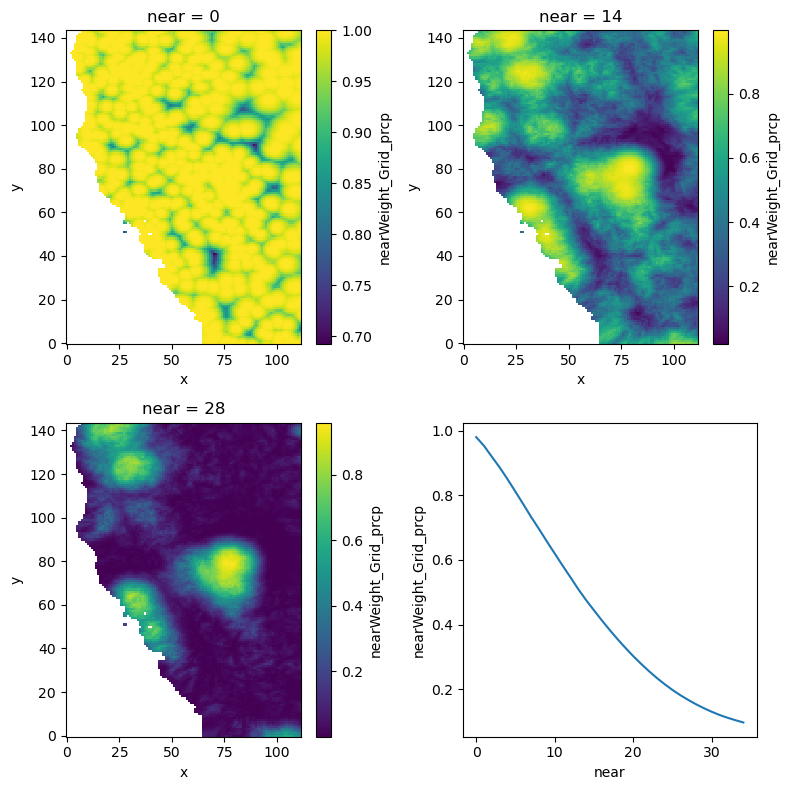

In [9]:
fig, axs = plt.subplots(2, 2, figsize=[8, 8])
axs = axs.flatten()

var = 'nearWeight_Grid_prcp'
tarnear = [0, 14, 28]
for i in range(3):
    ds_weight[var].isel(near=tarnear[i]).plot(ax=axs[i])
    
ds_weight[var].mean(dim=['x','y']).plot(ax=axs[3])
    
    
plt.tight_layout()
plt.show()

## Weighted regression outputs

### Leave-one-out regression
Assume a station does not exist, use nearby stations to regress estimates

In [10]:
ds_reg_cv = xr.load_dataset('../test_cases/cali2017/outputs/regression/LWLRstatic_stn_CV_regression_20170201-20170210.nc')
ds_reg_cv

<xarray.Dataset>
Dimensions:             (stn: 1219, met: 16, time: 10)
Coordinates:
  * stn                 (stn) int64 0 1 2 3 4 5 ... 1214 1215 1216 1217 1218
  * met                 (met) object 'CC' 'ME' 'RB' 'MAE' ... 'FAR' 'CSI' 'HSS'
  * time                (time) datetime64[ns] 2017-02-01 ... 2017-02-10
Data variables:
    prcp_boxcox         (stn, time) float32 -2.911 0.398 3.425 ... 0.5217 0.3352
    prcp_boxcox_metric  (stn, met) float64 0.7015 -5.585 -0.4979 ... nan nan nan
    prcp_poe            (stn, time) float32 0.2629 0.9998 1.0 ... 0.9226 0.8229
    prcp_poe_metric     (stn, met) float64 0.7503 -0.05786 ... 0.7778 0.4118
    tmean               (stn, time) float32 nan nan nan ... 6.393 7.611 4.289
    tmean_metric        (stn, met) float64 nan nan nan nan ... nan nan nan nan
    trange              (stn, time) float32 nan nan nan ... 9.459 6.197 8.098
    trange_metric       (stn, met) float64 nan nan nan nan ... nan nan nan nan

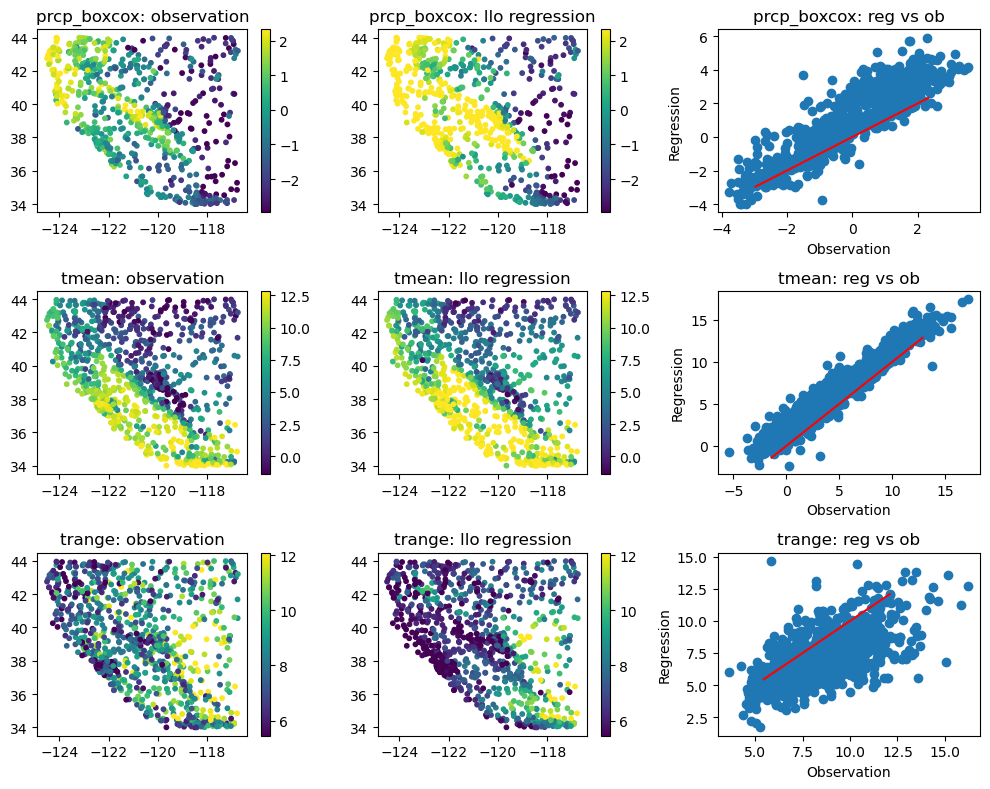

In [11]:
lat_stn = ds_stn.lat.values
lon_stn = ds_stn.lon.values


fig, axs = plt.subplots(3, 3, figsize=[10, 8])

varnames = ['prcp_boxcox','tmean','trange']

for i in range(3):
    d = ds_stn[varnames[i]].mean(dim='time').values
    d = d[~np.isnan(d)]
    p5 = np.percentile(d, 5)
    p95 = np.percentile(d, 95)
    
    axi = axs[i, 0]
    p = axi.scatter(lon_stn, lat_stn, 10, ds_stn[varnames[i]].mean(dim='time').values, vmin=p5, vmax=p95)
    plt.colorbar(p, ax=axi)
    axi.set_title(varnames[i]+': observation')
    
    axi = axs[i, 1]
    p = axi.scatter(lon_stn, lat_stn, 10, ds_reg_cv[varnames[i]].mean(dim='time').values, vmin=p5, vmax=p95)
    plt.colorbar(p, ax=axi)
    axi.set_title(varnames[i]+': llo regression')
    
    axi = axs[i, 2]
    p = axi.scatter(ds_stn[varnames[i]].mean(dim='time').values, ds_reg_cv[varnames[i]].mean(dim='time').values)
    axi.plot([p5, p95], [p5, p95], 'r')
    axi.set_title(varnames[i] + ': reg vs ob')
    axi.set_xlabel('Observation')
    axi.set_ylabel('Regression')
    
plt.tight_layout()
plt.show()

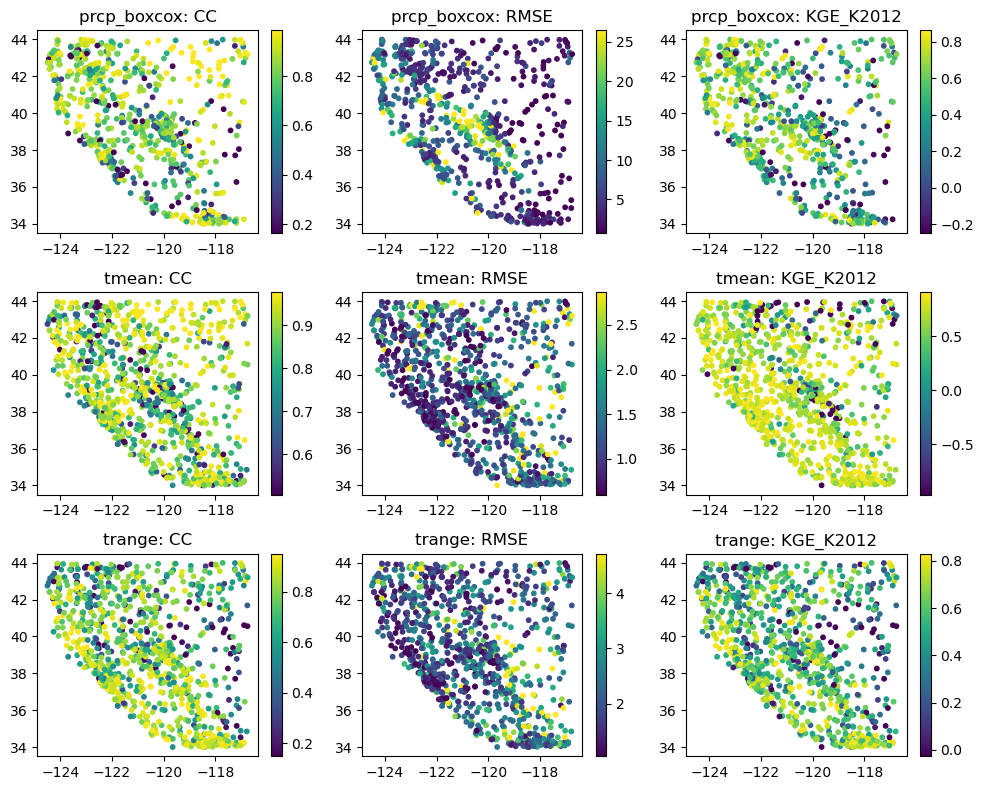

In [12]:
# example metrics
# note that metrics are calculated based on only 15 samples, so they are highly uncertain. the figure is just for demonstration

lat_stn = ds_stn.lat.values
lon_stn = ds_stn.lon.values


fig, axs = plt.subplots(3, 3, figsize=[10, 8])

varnames = ['prcp_boxcox','tmean','trange']
metric = ['CC', 'RMSE', 'KGE_K2012']
metind = [np.where(ds_reg_cv.met.values==m)[0][0] for m in metric]

for i in range(3):
    for j in range(3):
        d = ds_reg_cv[varnames[i]+'_metric'].values[:, metind[j]]
        p5 = np.percentile(d[~np.isnan(d)], 5)
        p95 = np.percentile(d[~np.isnan(d)], 95)

        axi = axs[i, j]
        p = axi.scatter(lon_stn, lat_stn, 10, d, vmin=p5, vmax=p95)
        plt.colorbar(p, ax=axi)
        axi.set_title(varnames[i]+': '+metric[j])


plt.tight_layout()
plt.show()

### Gridded regression

In [13]:
ds_reg_grid = xr.load_dataset('../test_cases/cali2017/outputs/regression/LWLRstatic_Grid_Regression_20170201-20170210.nc')
ds_reg_grid

<xarray.Dataset>
Dimensions:      (time: 10, lon: 112, lat: 144)
Coordinates:
  * time         (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-10
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.9 -117.8 -117.8
  * lat          (lat) float64 34.53 34.59 34.66 34.72 ... 43.34 43.41 43.47
Data variables:
    prcp_boxcox  (lat, lon, time) float32 nan nan nan ... 2.175 -0.1521 -3.17
    prcp_poe     (lat, lon, time) float32 nan nan nan ... 0.9971 0.9747 0.03191
    tmean        (lat, lon, time) float32 nan nan nan nan ... 2.553 5.997 4.422
    trange       (lat, lon, time) float32 nan nan nan nan ... 8.061 7.001 9.533

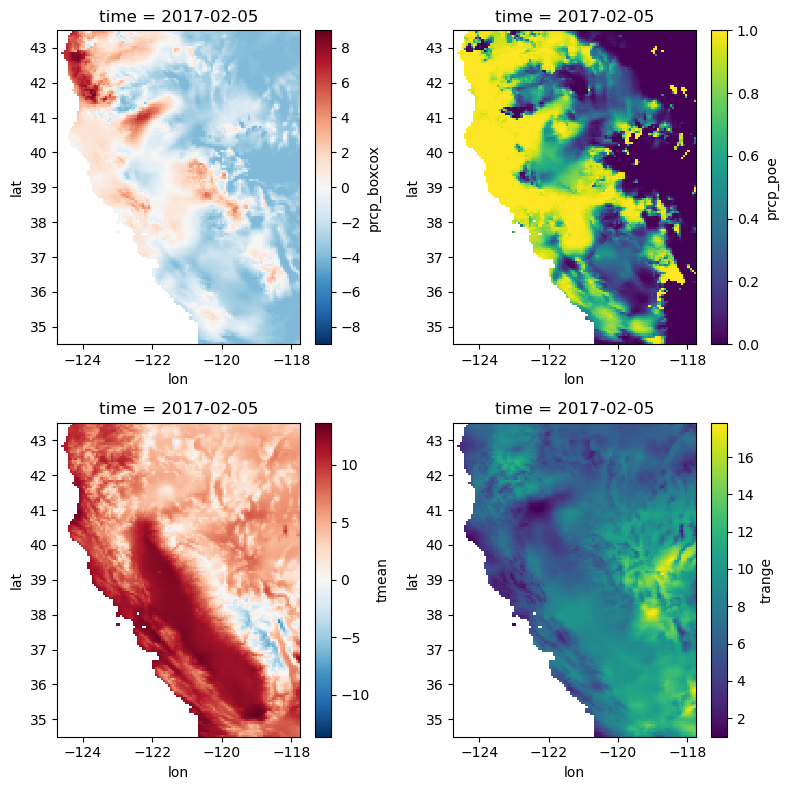

In [16]:

fig, axs = plt.subplots(2, 2, figsize=[8, 8])
axs = axs.flatten()

var = ['prcp_boxcox', 'prcp_poe', 'tmean', 'trange']
t = 4
for i in range(4):
    ds_reg_grid[var[i]].isel(time=t).plot(ax=axs[i])
    
plt.tight_layout()
plt.show()

### Gridded auxiliary data

In [17]:
ds_aux = xr.load_dataset('../test_cases/cali2017/outputs/regression/LWLRstatic_Auxiliary_20170201-20170210.nc')
ds_aux

<xarray.Dataset>
Dimensions:              (time: 10, x: 112, y: 144)
Coordinates:
  * time                 (time) datetime64[ns] 2017-02-01 ... 2017-02-10
  * x                    (x) int64 0 1 2 3 4 5 6 ... 105 106 107 108 109 110 111
  * y                    (y) int64 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables:
    latitude             (y, x) float64 34.53 34.53 34.53 ... 43.47 43.47 43.47
    longitude            (y, x) float64 -124.7 -124.7 -124.6 ... -117.8 -117.8
    uncert_prcp_boxcox   (y, x, time) float32 nan nan nan ... 2.343 1.829 2.135
    nearmax_prcp_boxcox  (y, x, time) float32 nan nan nan nan ... 5.4 1.8 2.037
    uncert_tmean         (y, x, time) float32 nan nan nan ... 1.412 3.509 2.065
    uncert_trange        (y, x, time) float32 nan nan nan ... 2.452 4.158 2.254

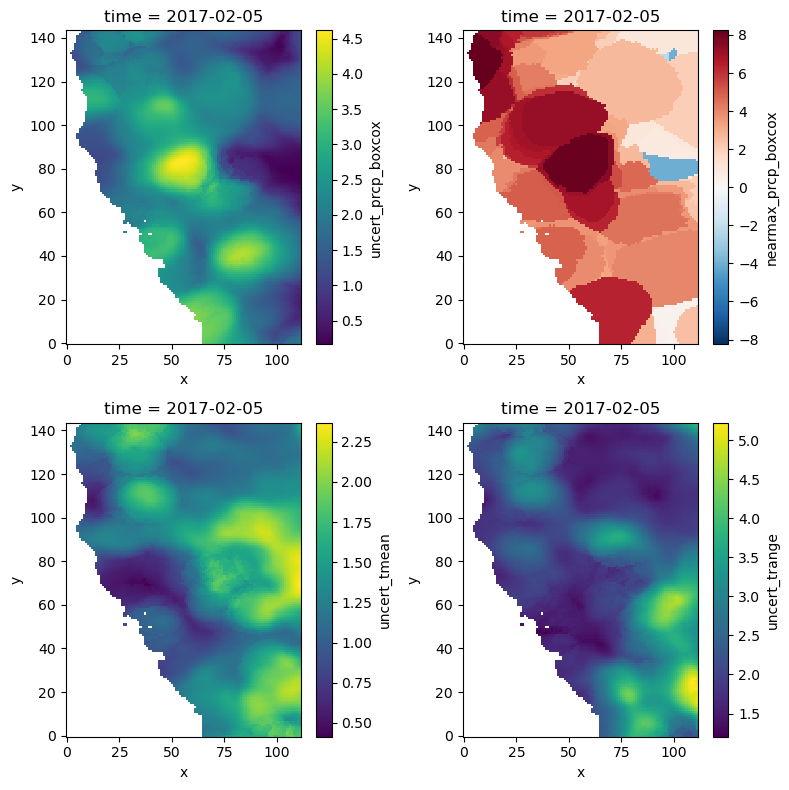

In [19]:
fig, axs = plt.subplots(2, 2, figsize=[8, 8])
axs = axs.flatten()

var = ['uncert_prcp_boxcox', 'nearmax_prcp_boxcox', 'uncert_tmean', 'uncert_trange']
t = 4
for i in range(4):
    ds_aux[var[i]].isel(time=t).plot(ax=axs[i])
    
plt.tight_layout()
plt.show()

## Ensemble outputs

### Auto and spatial correlation

In [20]:
ds_corr = xr.load_dataset('../test_cases/cali2017/outputs/stn_info/stn_time_space_correlation.nc')
ds_corr

<xarray.Dataset>
Dimensions:                    (z: 1, stn: 1219, time: 28, pair: 742371, pind: 2)
Coordinates:
  * z                          (z) int64 0
  * stn                        (stn) int64 0 1 2 3 4 ... 1215 1216 1217 1218
  * time                       (time) datetime64[ns] 2017-02-01 ... 2017-02-28
  * pair                       (pair) int64 0 1 2 3 ... 742368 742369 742370
  * pind                       (pind) int64 0 1
Data variables: (12/14)
    stnid                      (stn) |S11 b'US1CAAL0003' ... b'USW00094299'
    lat                        (stn) float64 37.72 41.82 36.99 ... 42.15 41.49
    lon                        (stn) float64 -122.1 -124.1 ... -121.7 -120.6
    elev                       (stn) float64 163.4 19.8 ... 1.245e+03 1.334e+03
    slp_n                      (stn) float64 1.953 -2.948 -18.5 ... -0.783 2.381
    slp_e                      (stn) float64 4.542 15.12 27.65 ... -0.337 3.916
    ...                         ...
    tmean_cc_lag1              (stn) float64 nan nan nan ... 0.7682 0.8496
    tmean_cc_lag1_mean         (z) float64 0.7266
    trange_cc_lag1             (stn) float64 nan nan nan ... 0.2093 0.6721
    trange_cc_lag1_mean        (z) float64 0.4211
    prcp_trange_cc_cross       (stn) float64 nan nan nan ... -0.133 -0.5505
    prcp_trange_cc_cross_mean  (z) float64 -0.4022

### Probabilistic outputs

In [21]:
ds_ens1 = xr.open_dataset('../test_cases/cali2017/outputs/ensembles/LWLRstatic_ensMember_20170201-20170210_001.nc')
ds_ens1

<xarray.Dataset>
Dimensions:  (time: 10, lat: 144, lon: 112)
Coordinates:
  * time     (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-10
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.5 ... -117.9 -117.8 -117.8
  * lat      (lat) float64 34.53 34.59 34.66 34.72 ... 43.28 43.34 43.41 43.47
Data variables:
    tmean    (time, lat, lon) float32 ...
    trange   (time, lat, lon) float32 ...
    prcp     (time, lat, lon) float32 ...

In [22]:
# # random number field map. This is only possible if output random field is activated in the configuration file
# fig, axs = plt.subplots(3, 5, figsize=[12, 7])

# var = ['prcp_rnd', 'trange_rnd', 'tmean_rnd']
# ens = [1,2,3,4,5]
# t = 10

# for i in range(len(ens)):
#     dsi = xr.open_dataset(f"../test_cases/cali2017/outputs/ensembles/LWLRstatic_ensMember_20170201-20170210_{ens[i]:03}.nc")
#     for j in range(len(var)):
#         axij = axs[j,i]
#         dsi[var[j]].isel(time=t).plot(ax=axij)
#         axij.axis('off')
#         axij.set_title(f'Random field. Member: {ens[i]}')
    
# plt.tight_layout()
# plt.show()

In [23]:
# # random number field hist: one time step
# fig, axs = plt.subplots(3, 5, figsize=[12, 7])

# var = ['prcp_rnd', 'trange_rnd', 'tmean_rnd']
# ens = [1,2,3,4,5]
# t = 10

# for i in range(len(ens)):
#     dsi = xr.open_dataset(f"../test_cases/cali2017/outputs/ensembles/LWLRstatic_ensMember_20170201-20170210_{ens[i]:03}.nc")
#     for j in range(len(var)):
#         axij = axs[j,i]
#         axij.hist(dsi[var[j]].isel(time=t).values.flatten(), np.arange(-4, 4, 0.1))
#         axij.plot([0, 0], [0, 800], 'r')
#         # axij.axis('off')
#         axij.set_title(f'Random field. Member: {ens[i]}')
    
# plt.tight_layout()
# plt.show()

In [24]:
# # random number field hist: all time steps
# fig, axs = plt.subplots(3, 5, figsize=[12, 7])

# var = ['prcp_rnd', 'trange_rnd', 'tmean_rnd']
# ens = [1,2,3,4,5]
# t = 10

# for i in range(len(ens)):
#     dsi = xr.open_dataset(f"../test_cases/cali2017/outputs/ensembles/LWLRstatic_ensMember_20170201-20170210_{ens[i]:03}.nc")
#     for j in range(len(var)):
#         axij = axs[j,i]
#         axij.hist(dsi[var[j]].values.flatten(), np.arange(-4, 4, 0.1))
#         axij.plot([0, 0], [0, 8000], 'r')
#         # axij.axis('off')
#         axij.set_title(f'Random field. Member: {ens[i]}')
    
# plt.tight_layout()
# plt.show()

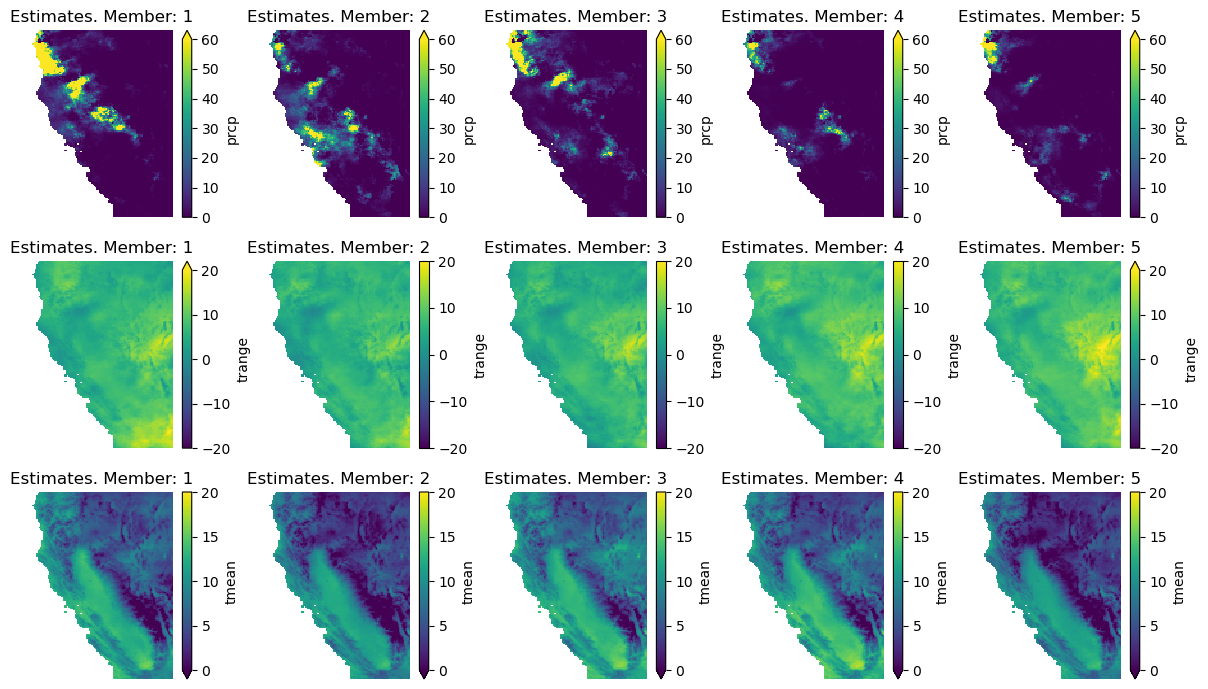

In [26]:
# variable plot: 10th time step
fig, axs = plt.subplots(3, 5, figsize=[12, 7])

var = ['prcp', 'trange', 'tmean']
ens = [1,2,3,4,5]
t = 4

vmins = [0, -20, 0]
vmaxs = [60, 20, 20]

for i in range(len(ens)):
    dsi = xr.open_dataset(f"../test_cases/cali2017/outputs/ensembles/LWLRstatic_ensMember_20170201-20170210_{ens[i]:03}.nc")
    for j in range(len(var)):
        axij = axs[j,i]
        dsi[var[j]].isel(time=t).plot(ax=axij, vmin=vmins[j], vmax=vmaxs[j])
        axij.axis('off')
        axij.set_title(f'Estimates. Member: {ens[i]}')
    
plt.tight_layout()
plt.show()